In [22]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score



In [23]:
# Reading dataset
data = pd.read_csv(r"C:\Users\Muska\Downloads\Agri.csv")
print(f"Shape of the dataset: {data.shape}")

Shape of the dataset: (2200, 8)


In [24]:
# Checking basic info and missing values
print(data.head())


    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [25]:
print( "\nMissing values:\n", data.isnull().sum())


Missing values:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [26]:
# Seasonal crop suitability
print("Summer Crops:", data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print("Winter Crops:", data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique())
print("Rainy Crops:", data[(data['rainfall'] > 200) & (data['humidity'] > 30)]['label'].unique())


Summer Crops: ['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
Winter Crops: ['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
Rainy Crops: ['rice' 'papaya' 'coconut']


In [27]:
# Summary statistics
print("Average N:", data['N'].mean(), "| P:", data['P'].mean(), "| K:", data['K'].mean())
print("Average Temp:", data['temperature'].mean(), "| Humidity:", data['humidity'].mean(), 
      "| PH:", data['ph'].mean(), "| Rainfall:", data['rainfall'].mean())

Average N: 50.653636363636366 | P: 53.39727272727273 | K: 48.17818181818182
Average Temp: 25.616243851779544 | Humidity: 71.48177921778637 | PH: 6.469480065256364 | Rainfall: 103.46365541576817


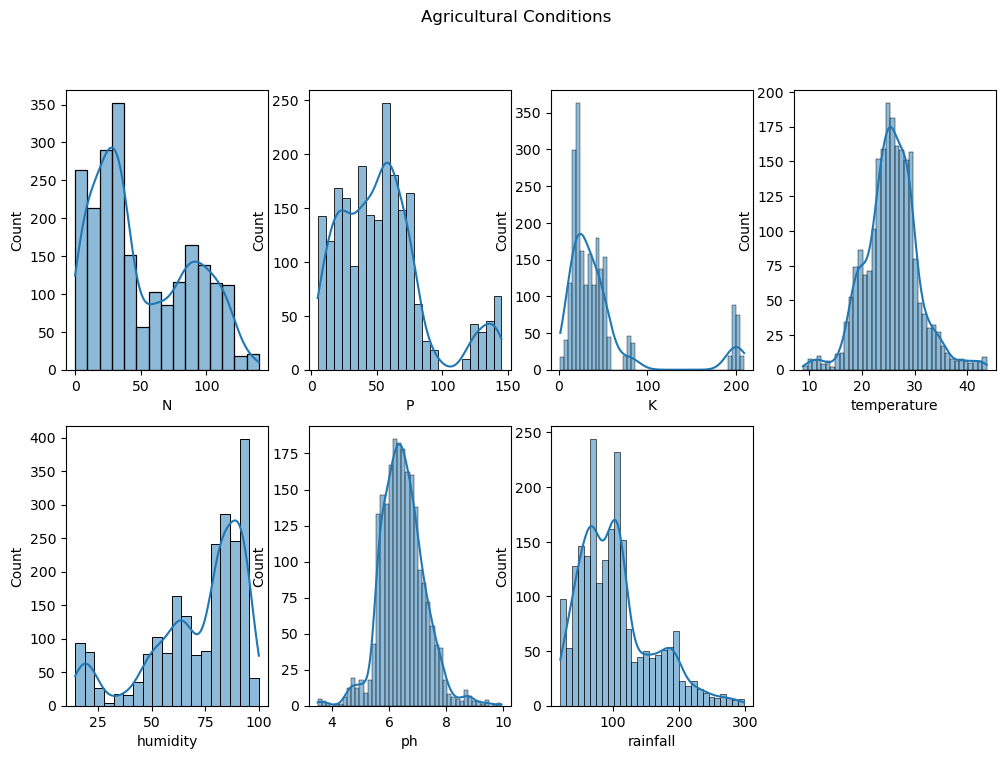

In [48]:
# Visualizations of conditions
plt.figure(figsize=(12, 8))
for i, col in enumerate(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], start=1):
    plt.subplot(2, 4, i)
    sns.histplot(data[col], kde=True)
    plt.xlabel(col)
plt.suptitle('Agricultural Conditions')
plt.show()


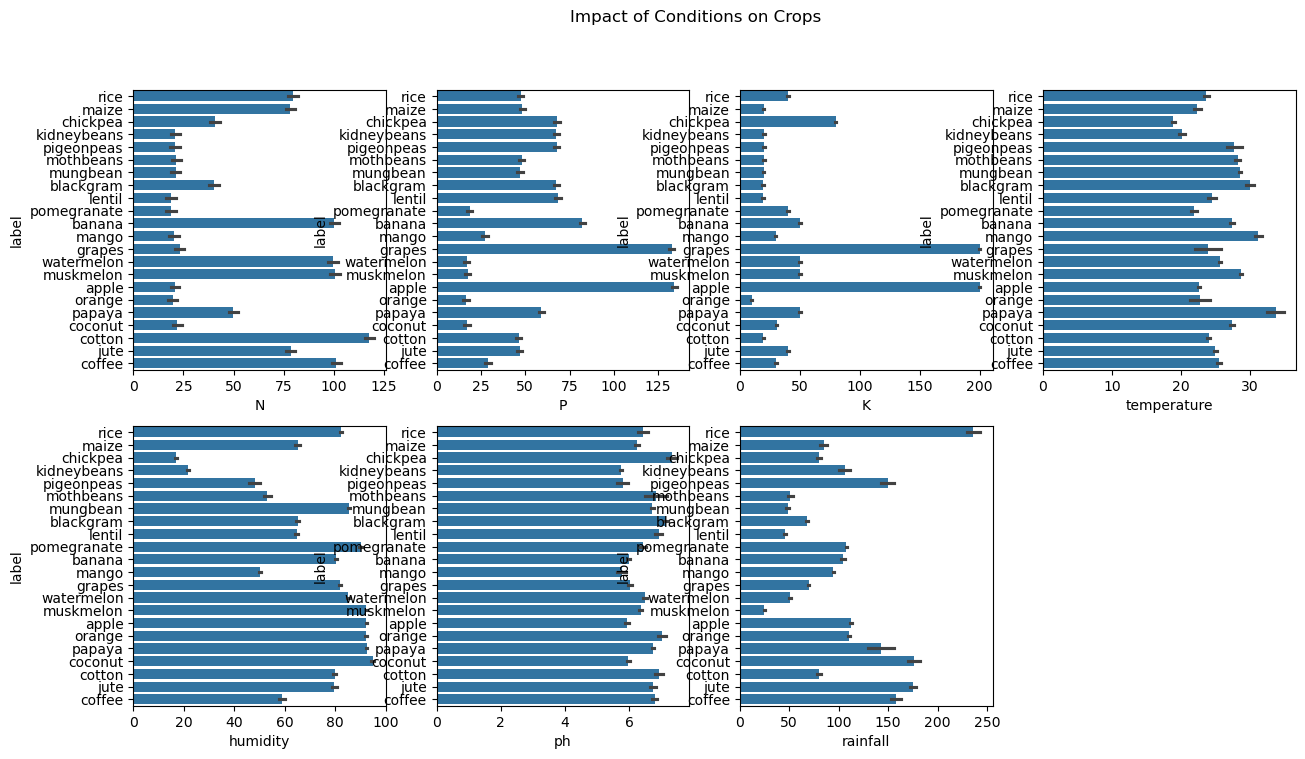

In [42]:
# Visualizing conditions impact on crops
plt.figure(figsize=(15, 8))
for i, col in enumerate(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], start=1):
    plt.subplot(2, 4, i)
    sns.barplot(data=data, x=col, y='label')
    plt.xlabel(col)
plt.suptitle('Impact of Conditions on Crops')
plt.show()


In [43]:
# Model Training - Decision Tree Classifier
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2)
model.fit(X_train, y_train)
predicted = model.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%")



Decision Tree Accuracy: 90.00%


In [44]:


# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=2)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f"K-Nearest Neighbors Accuracy: {knn_accuracy * 100:.2f}%")


Random Forest Accuracy: 93.18%
K-Nearest Neighbors Accuracy: 97.50%


In [40]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.64      1.00      0.78        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       0.95      0.91      0.93        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.21      0.35        28
 kidneybeans       1.00      0.79      0.88        14
      lentil       0.95      0.83      0.88        23
       maize       0.79      0.90      0.84        21
       mango       1.00      0.92      0.96        26
   mothbeans       0.71      0.53      0.61        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

In [47]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data, and transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now train the Logistic Regression model on scaled data
log_reg_model = LogisticRegression(max_iter=500)
log_reg_model.fit(X_train_scaled, y_train)
log_reg_pred = log_reg_model.predict(X_test_scaled)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print(f"Logistic Regression Accuracy: {log_reg_accuracy * 100:.2f}%")


Logistic Regression Accuracy: 96.14%
